In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
stores = pd.read_csv(r"..\Data\01_raw\stores.csv")
train = pd.read_csv(r"..\Data\01_raw\train.csv")

In [5]:
train_stores_df = pd.merge(train, stores, on='store_nbr', how='outer')

In [24]:
train_stores_df

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...
3000883,3000751,2017-08-15,54,POULTRY,59.619,0,El Carmen,Manabi,C,3
3000884,3000752,2017-08-15,54,PREPARED FOODS,94.000,0,El Carmen,Manabi,C,3
3000885,3000753,2017-08-15,54,PRODUCE,915.371,76,El Carmen,Manabi,C,3
3000886,3000754,2017-08-15,54,SCHOOL AND OFFICE SUPPLIES,0.000,0,El Carmen,Manabi,C,3


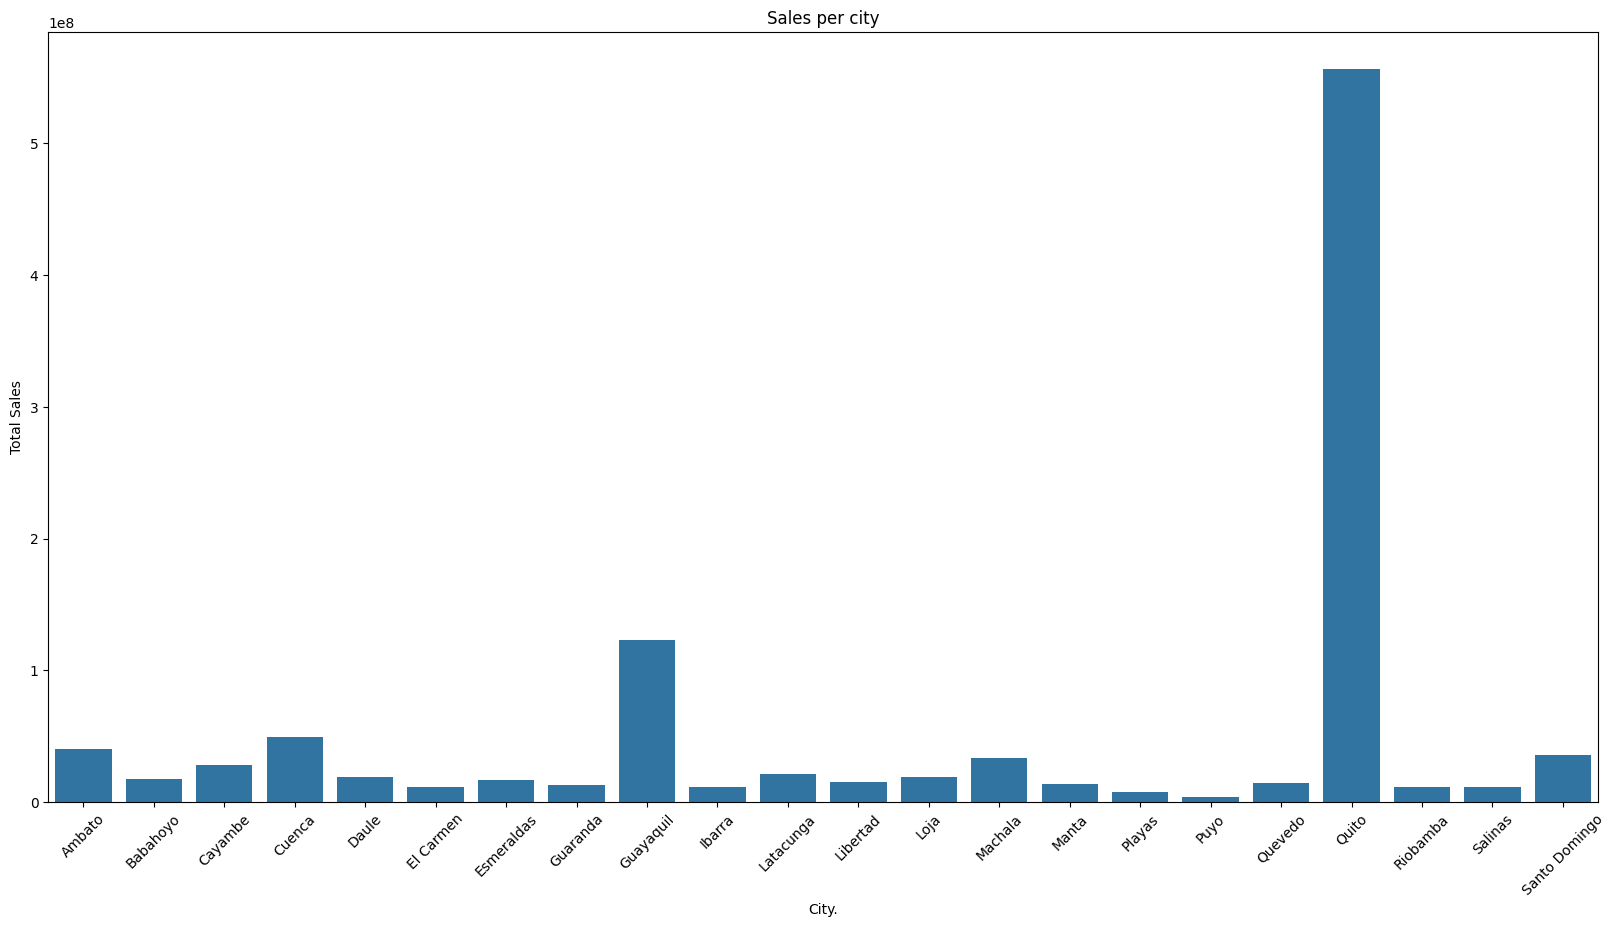

In [17]:
sales_by_city=train_stores_df.groupby('city')['sales'].sum().reset_index()
plt.figure(figsize=(20,10))
sns.barplot(x = "city", y= "sales", data = sales_by_city)
plt.xticks(rotation = 45)
plt.title('Sales per city')
plt.ylabel('Total Sales')
plt.xlabel('City.')
plt.show()

1. Quito has highest number of sales as it has most number of stores and it is the capital city of Ecuador. 
2. Followed by Quito is Guayaquil which is a popular tourist destination.

<Axes: xlabel='store_nbr', ylabel='sales'>

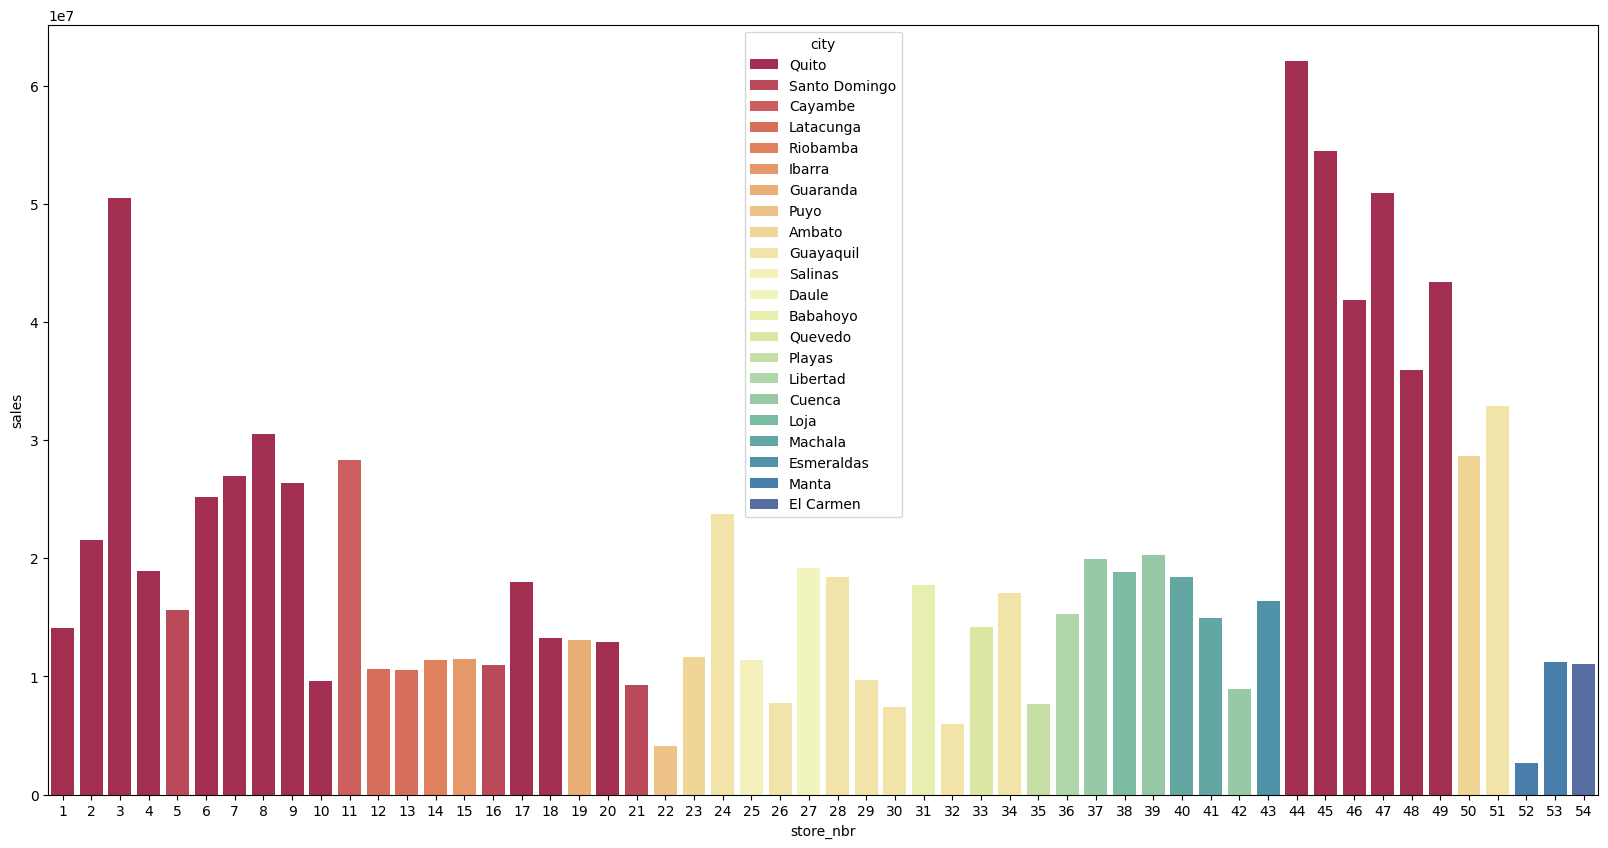

In [23]:
check = train_stores_df.groupby(['city','store_nbr'])['sales'].sum().to_frame()
check.sort_values('sales')
check.reset_index()
plt.figure(figsize = (20, 10))
sns.barplot(data = check, x = 'store_nbr', y = 'sales', hue = 'city', palette = 'Spectral')

Maximum stores are located in Quito that is 18.
At an average sales in stores located in Quito have higher sales.

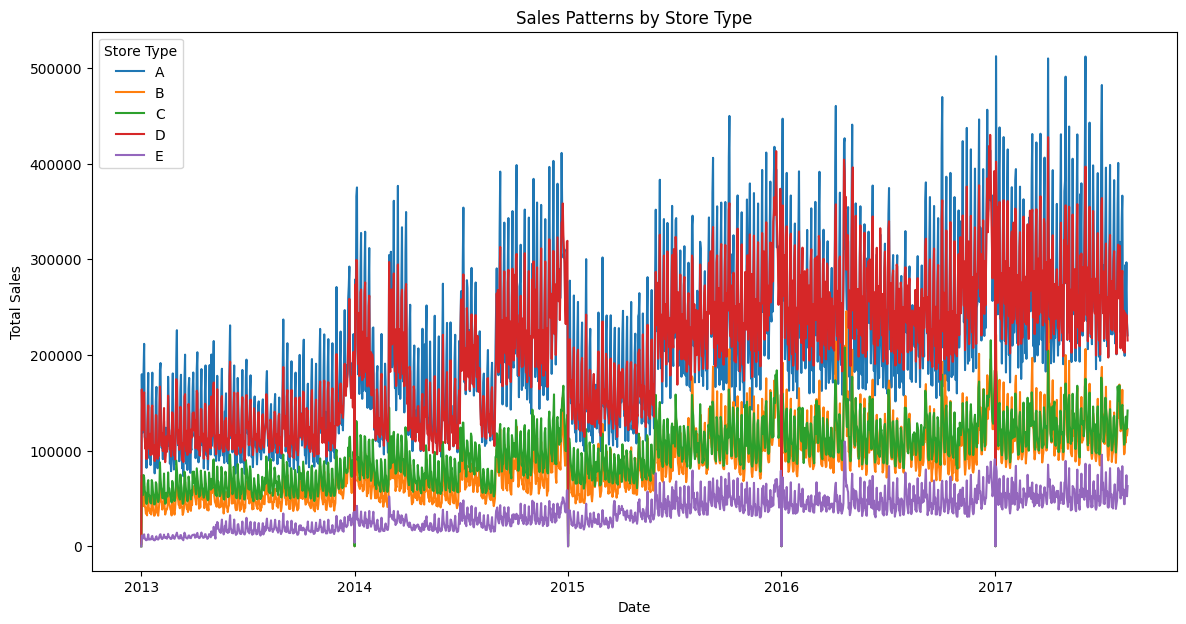

In [26]:
train_stores_df['date'] = pd.to_datetime(train_stores_df['date'])

sales_by_type = train_stores_df.groupby(['date', 'type'])['sales'].sum().unstack()
plt.figure(figsize=(14, 7))
for column in sales_by_type.columns:
    plt.plot(sales_by_type.index, sales_by_type[column], label=column)

plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Patterns by Store Type')
plt.legend(title='Store Type')

<Figure size 2000x1000 with 0 Axes>

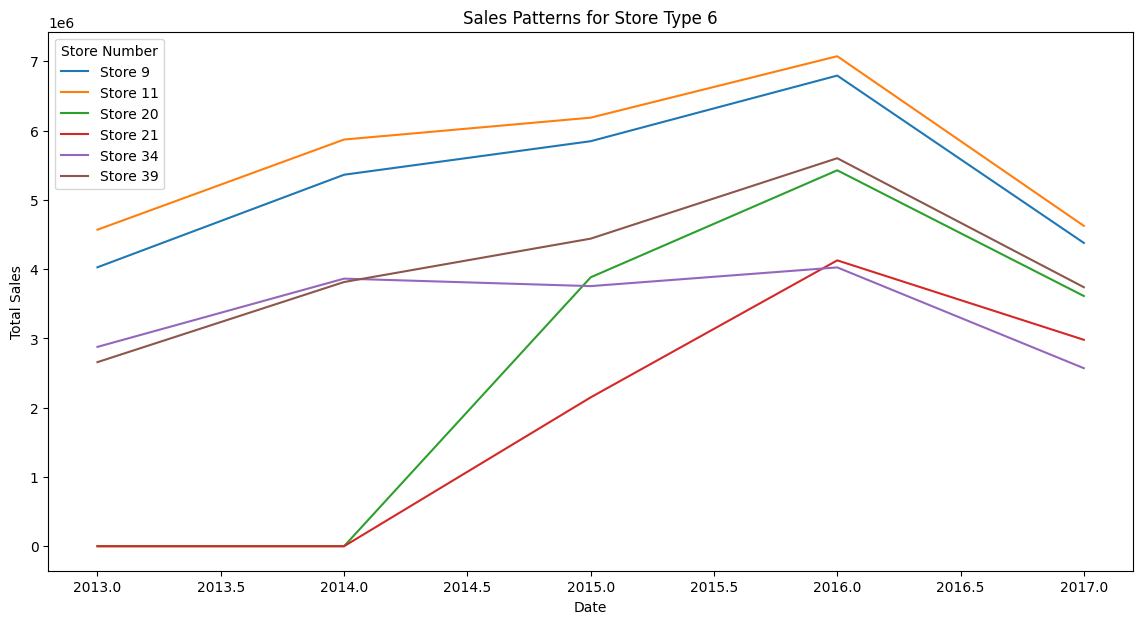

In [39]:
train_stores_df['year'] = train_stores_df['date'].dt.year
store_type = 6
filtered_df = train_stores_df[train_stores_df['cluster'] == store_type]

sales_by_store_nbr = filtered_df.groupby(['year', 'store_nbr'])['sales'].sum().unstack()

plt.figure(figsize=(20,10))
plt.figure(figsize=(14, 7))
for column in sales_by_store_nbr.columns:
    plt.plot(sales_by_store_nbr.index, sales_by_store_nbr[column], label=f'Store {column}')

plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title(f'Sales Patterns for Store Type {store_type}')
plt.legend(title='Store Number')